In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import common

## Users

In [3]:
# users
users = pd.read_csv('users.csv')
users.head()

,user_id,country_code,city_id,company_id,discipline_id
0,1,de,2911298,119114,12.0
1,2,de,2911298,236135,13.0
2,14,de,2950159,192752,13.0
3,20,de,2917544,291107,13.0
4,21,de,2911298,56810,14.0


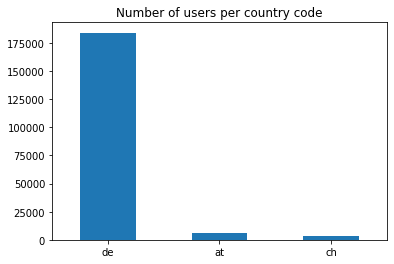

In [23]:
# Number of users per country code
users.country_code.value_counts().plot(
    kind ='bar', 
    rot=0,
    title='Number of users per country code'
);

There are 3 countries (is it germany, austria and switzerland?)

In [33]:
# Number of users per country code
users.groupby(by='city_id')['user_id'].count().sort_values(ascending=False)

city_id
2911298     14266
2867714     12095
2950159      9464
2925533      8494
2886242      7309
            ...  
2868992         1
2869025         1
2869026         1
2869168         1
12188617        1
Name: user_id, Length: 6593, dtype: int64

There are 6593 different cities

In [34]:
# Number of users per company
users.groupby(by='company_id')['user_id'].count().sort_values(ascending=False)

company_id
301210    648
302627    549
301956    486
302687    447
300110    447
         ... 
49643       1
49642       1
175918      1
175925      1
13          1
Name: user_id, Length: 63262, dtype: int64

There are 63262 different companies

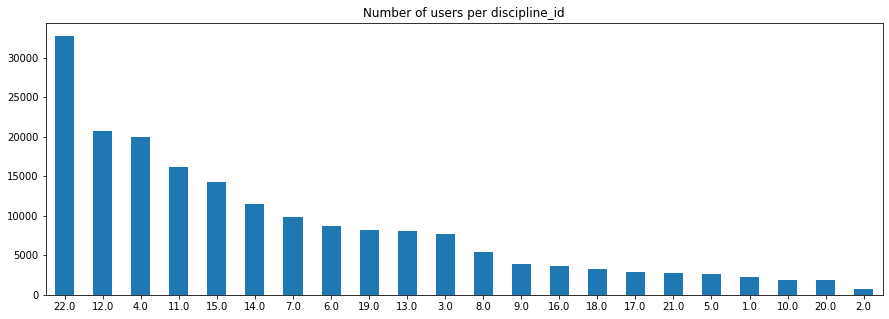

In [40]:
# Number of users per discipline_id
users.discipline_id.value_counts().plot(
    kind='bar', 
    rot=0,
    title='Number of users per discipline_id',
    figsize=(15,5)
);

## Connections

In [42]:
# Train dataset
connections_train = pd.read_csv('connections_train.csv')
print('Average train target positive rate = {}'.format(np.mean(connections_train['added'])))
connections_train.head()

Average train target positive rate = 0.10756333333333333


,user_id,recommended_contact_id,n_shared_contacts,ecommended_at,added
0,2086671,2212504,3,1,True
1,1309409,1930913,6,2,True
2,1038982,1136465,17,3,True
3,2358484,2359329,0,4,True
4,848002,1016841,0,5,True


In [12]:
# Test dataset
connections_test = pd.read_csv('connections_test.csv')
print('Average test target positive rate = {}'.format(np.mean(connections_test['added'])))
connections_test.head()

Average test target positive rate = 0.03193


,user_id,recommended_contact_id,n_shared_contacts,ecommended_at,added
0,534691,843530,0,900001,False
1,534691,847103,0,900002,False
2,534691,855886,0,900003,False
3,534691,862772,0,900004,False
4,534691,916386,0,900005,False


There's a considerable difference in the target hit rate between the train and test datasets. There might have been some kind of upsampling or downsampling applied to the datasets.

This could be especially important because of the nature of the problem. If the platform is recommending connections to a user, there is a opportunity cost, as the user might not be willing to scroll trough a long list of  recommended connections. 

Therefore, we can assume that this classification problem can also be seen from a ranking perpective: the system should assign a probability to each recommendation and present to the user the top n recommendations with the highest probability. 



In [52]:
print('Train timestamps varie between {} and {}'.format(
    np.min(connections_train['ecommended_at']),
    np.max(connections_train['ecommended_at'])
    ))

print('Test timestamps varie between {} and {}'.format(
    np.min(connections_test['ecommended_at']),
    np.max(connections_test['ecommended_at'])
    ))

Train timestamps varie between 1 and 900000
Test timestamps varie between 900001 and 1000000


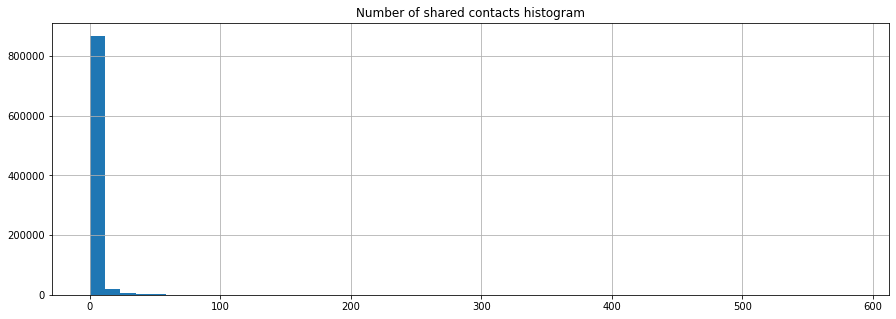

In [95]:
# Number of shared contacts
plt.subplot(1,1,1)
axes=connections_train['n_shared_contacts'].hist(
    bins=50,
    figsize=(15,5)
)
plt.title("Number of shared contacts histogram");

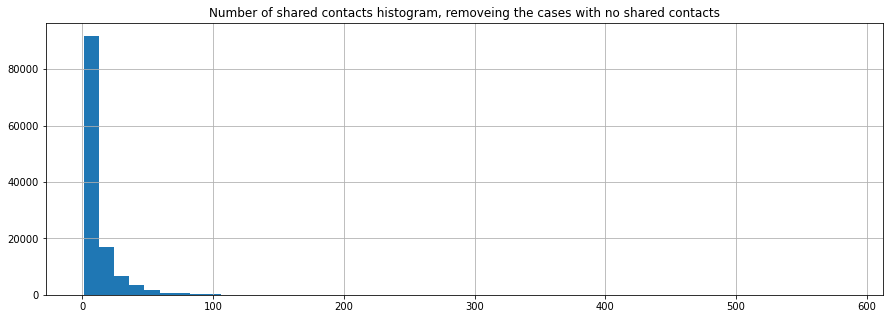

In [97]:
# Number of shared contacts, removing the cases where n_shared_contacts = 0
plt.subplot(1,1,1)
axes=connections_train[connections_train['n_shared_contacts'] != 0]['n_shared_contacts'].hist(
    bins=50,
    figsize=(15,5)
)
plt.title("Number of shared contacts histogram, removeing the cases with no shared contacts");

In [91]:
enriched_connections = common.enrich_dataset(connections_train, users)
enriched_connections

,user_id_x,recommended_contact_id,n_shared_contacts,ecommended_at,added,country_code_user,city_id_user,company_id_user,discipline_id_user,user_id_y,country_code_rec,city_id_rec,company_id_rec,discipline_id_rec,same_country,same_city,same_company,same_discipline
0,2086671,2212504,3,1,True,de,2850257,162892,22.0,2212504,de,2892794,263358,14.0,1,0,0,0
1,1309409,1930913,6,2,True,de,2947416,112551,7.0,1930913,de,2934246,112551,21.0,1,0,1,0
2,1038982,1136465,17,3,True,de,2861650,300967,8.0,1136465,de,2861650,300967,9.0,1,1,1,0
3,2358484,2359329,0,4,True,de,2928810,265548,9.0,2359329,de,2892518,14763,22.0,1,0,0,0
4,2114170,2359329,1,163380,True,de,2847736,49243,22.0,2359329,de,2892518,14763,22.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,37985,82229,12,899798,True,de,2944368,259290,15.0,82229,de,2911298,299496,15.0,1,0,0,1
899996,416088,1290388,1,899799,True,de,2934691,101221,15.0,1290388,de,2934691,131370,3.0,1,1,0,0
899997,400696,1213424,29,899800,True,de,2867714,107180,14.0,1213424,de,2911298,107180,4.0,1,0,1,0
899998,1615629,2091036,3,899827,True,de,2886242,70250,7.0,2091036,de,2911298,70250,19.0,1,0,1,0


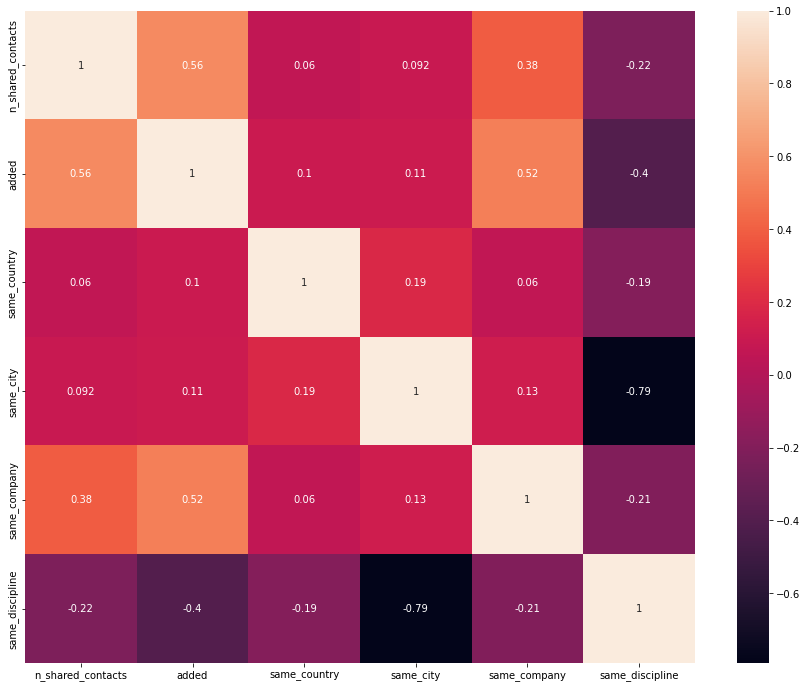

In [94]:
fig, ax = plt.subplots(figsize=(15,12))

# columns to use for prediction
column_list = [
    #'user_id_x',
    #'recommended_contact_id',
    'n_shared_contacts',
    #'ecommended_at',
    'added',
    #'country_code_user',
    #'city_id_user',
    #'company_id_user',
    #'discipline_id_user',
    #'user_id_y',
    #'country_code_rec',
    #'city_id_rec',
    #'company_id_rec',
    #'discipline_id_rec',
    'same_country',
    'same_city',
    'same_company',
    'same_discipline'
    ]

corrMatrix = enriched_connections[column_list].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

There is a considerable correlation between the target (added) and the features created by enriching the dataset(    'same_country', 'same_city', 'same_company', 'same_discipline') and the number of shared contacts